In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# Cleaning the data

## Cleaning the My Anime List Reviews dataset

In [2]:
df = pd.read_csv("myAnimeListReviews/reviews.csv")

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
df.head()

(99944, 8)


,Rating,Enjoyment,Sound,review_text,Animation,Character,Story,Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n Top\r\n ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Next
2,8,6.0,9,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,9,7.0,6,Nyanbo!
3,7,5.0,6,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,7.0,6,Boku no Pico
4,10,10.0,10,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,10.0,9,Kimi no Na wa.


In [4]:
df = df[["Name", "review_text", "Rating", "Story", "Animation", "Sound", "Character", "Enjoyment"]]

In [5]:
df.head()

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
0,\r\n Top\r\n ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Next,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,6,9,9,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7,6,6,6,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,9,10,10,10.0,10.0


In [6]:
df.isnull().sum()

Name            3702
review_text     7404
Rating          7404
Story          10540
Animation      10584
Sound          11076
Character      10637
Enjoyment      11115
dtype: int64

In [7]:
df.dropna().shape

(88385, 8)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Name           0
review_text    0
Rating         0
Story          0
Animation      0
Sound          0
Character      0
Enjoyment      0
dtype: int64

In [10]:
df.dtypes

Name            object
review_text     object
Rating          object
Story           object
Animation       object
Sound           object
Character      float64
Enjoyment      float64
dtype: object

In [11]:
df[df["Story"].astype(str).map(lambda x: ',' in x)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
14490,Toradora!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,"5,6",6,6,7.0,8.0
14858,Akame ga Kill!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,5,"5,4",5,8,3.0,5.0
59124,Heart no Kuni no Alice: Wonderful Wonder World,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,"1,9",10,10,10.0,9.0


In [12]:
columns = ["Rating", "Story", "Animation", "Sound"]

for col in columns:
    df = df[df[col].astype(str).map(lambda x: ',' not in x)]
    df[col] = df[col].astype(float)

In [13]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [14]:
columns = ["Name", "review_text"]

for col in columns:
    df[col] = df[col].astype(str)

In [15]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [16]:
col = "Name"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [17]:
col = "review_text"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [18]:
df.rename(columns={'review_text':'Review'}, inplace=True)

In [19]:
df.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,7.0,10.0,10.0,7.0,7.0


In [20]:
df.dtypes, df.shape

(Name          object
 Review        object
 Rating       float64
 Story        float64
 Animation    float64
 Sound        float64
 Character    float64
 Enjoyment    float64
 dtype: object, (88255, 8))

In [21]:
df.describe()

,Rating,Story,Animation,Sound,Character,Enjoyment
count,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000
mean,7.561759,7.181723,7.935528,7.845606,7.441119,7.746247
std,2.225516,2.400374,1.830413,1.881528,2.463746,2.425485
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
df1 = df

## Cleaning the Anime News Newtwork Reviews dataset

In [23]:
df = pd.read_csv("AnimeNewsNetworkReviews/reviews.csv")

In [24]:
df.head()

,Name2,Review,Synopsis,Good_points,Ratings,Name,Bad_points
0,GN 7,"\r\n,\r\nA Silent Voice reached its climax at ...","At last, Shoya has woken up. Racing to the bri...",Maintains A Silent Voice's usual acuity of ar...,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}",A Silent Voice,"Feels a bit overlong in its resolutions, and ..."
1,DVD 1,"\r\n,\r\nTo fully and correctly appreciate 009...",In a world where the Cold War continues well p...,"Musical score, fan service.","{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",009-1,"Some character designs are appallingly ugly, ..."
2,Sub.Blu-Ray,"\r\n,\r\nWhat happens when you take twenty-sev...",Haruto can't bring himself to accept that his ...,"Some great voice work and nice animation, tri...","{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",A Town Where You Live,Story comes off melodramatic without much emo...
3,GN 6,"\r\n,\r\nIt's always an interesting experience...","Seeing Shoko about to leap off her balcony, Sh...",Doubles down on the manga's terrific characte...,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}",A Silent Voice,A couple dramatic points felt a little loosel...
4,GN 4,"\r\n,\r\nIt feels like A Silent Voice's densit...",Things continue to change little by little for...,Continues to demonstrate wondrously poignant ...,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",A Silent Voice,Some dramatic developments here could have us...


In [25]:
df = df[["Name", "Name2", "Ratings", "Synopsis", "Review" ,"Good_points", "Bad_points"]]

In [26]:
df.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","At last, Shoya has woken up. Racing to the bri...","\r\n,\r\nA Silent Voice reached its climax at ...",Maintains A Silent Voice's usual acuity of ar...,"Feels a bit overlong in its resolutions, and ..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",In a world where the Cold War continues well p...,"\r\n,\r\nTo fully and correctly appreciate 009...","Musical score, fan service.","Some character designs are appallingly ugly, ..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",Haruto can't bring himself to accept that his ...,"\r\n,\r\nWhat happens when you take twenty-sev...","Some great voice work and nice animation, tri...",Story comes off melodramatic without much emo...
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","Seeing Shoko about to leap off her balcony, Sh...","\r\n,\r\nIt's always an interesting experience...",Doubles down on the manga's terrific characte...,A couple dramatic points felt a little loosel...
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",Things continue to change little by little for...,"\r\n,\r\nIt feels like A Silent Voice's densit...",Continues to demonstrate wondrously poignant ...,Some dramatic developments here could have us...


In [27]:
df.isnull().sum()

Name            12
Name2          257
Ratings          0
Synopsis         0
Review           0
Good_points     32
Bad_points      35
dtype: int64

In [28]:
df.dtypes, df.shape

(Name           object
 Name2          object
 Ratings        object
 Synopsis       object
 Review         object
 Good_points    object
 Bad_points     object
 dtype: object, (4174, 7))

In [29]:
col = "Bad_points"

df[df[col].map(lambda x: type(x) is not str)].head(4)

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
11,Zero Time Dilemma,PS Vita,"{'Music': 'A-', 'Graphics': 'B', 'Overall': 'A...",The latest installment in Kotaro Uchikoshi's a...,"\r\n,\r\nZero Time Dilemma is a game that almo...",NaN,NaN
114,Etrian Odyssey IV: Legends of the Titan,Nintendo 3DS,"{'Music': 'A-', 'Graphics': 'A-', 'Overall': '...",The fourth Etrian Odyssey brings back most of ...,"\r\n,\r\nAnyone would be wary of a series that...",Series-standard Etrian Odyssey gameplay marri...,NaN
159,Anime,A Guide to Japanese Animation (1958-1988),{},"Soft Cover,\r\n320 pages,\r\nBlack & White,\r\...","""Anime, A guide to Japanese Animation"" was fir...",NaN,NaN
260,X TV,[ONE],"{'Animation': 'B+', 'Overall (dub)': 'B', 'Mus...","In the first volume of X, the Dragons of the E...",The long awaited X television series is finall...,NaN,NaN


In [30]:
df2 = df #not much cleaning needed

# Preprocessing the text data and the ratings data

## Preprocessing text

In [31]:
from nltk import word_tokenize

def preprocess_text(text):
    if not pd.isnull(text):
        text = re.sub(r'\n|\t|\r', r' ', text, flags = re.DOTALL) #removing \n, \t and \r
        text = re.sub(r' +', r' ', text) #multiple spaces to one space
        text = text.lower()
        text = word_tokenize(text)   
    
    return text

In [32]:
print( preprocess_text(df1.loc[5, "Review"]) )

['i', 'really', 'wanted', 'to', 'like', 'this', 'movie', '.', 'i', 'really', 'really', 'did', '.', 'it', 'has', 'all', 'the', 'ingredients', 'i', 'like', '.', 'fantasy/magic', ',', 'an', 'isolated', 'character', 'interacting', 'with', 'the', "'real", 'world', "'", 'for', 'the', 'first', 'time', ',', 'a', 'mix', 'of', 'comedy', '(', 'slapstick', 'and', 'cerebral', ')', ',', 'drama', ',', 'aliens', ',', 'and', 'a', 'ghost', 'sink', '.', 'i', 'do', "n't", 'know', 'if', 'it', 'was', 'the', 'subtle', 'differences', 'between', 'korean', 'and', 'japanese', 'animation', 'that', 'threw', 'me', ',', 'or', 'the', 'fact', 'that', 'they', 'tried', 'to', 'stuff', 'a', 'full', ',', '12', 'episode', 'tv', 'series', '(', '~288', 'minutes', ')', 'into', 'an', '80', 'minute', 'movie', '.', 'all', 'i', 'know', 'is', 'that', 'this', 'movie', 'did', "n't", 'click', 'for', 'me', '.', 'taken', 'separately', ',', 'each', 'of', 'the', 'plot', 'devices', 'are', 'great', '.', 'the', 'problem', 'i', 'had', 'was', 

In [33]:
print( preprocess_text(df2.loc[5, "Review"]) )

['i', 'normally', 'regard', 'yoshiaki', 'kawajiri', 'as', 'being', 'generally', 'overhyped', 'when', 'it', 'comes', 'to', 'anime', 'directors', '.', 'i', 'was', "n't", 'overly', 'enamored', 'with', 'ninja', 'scroll', '.', 'demon', 'city', 'shinjuku', 'and', 'cyber', 'city', 'oedo', '808', 'were', 'entertaining', ',', 'but', 'ultimately', 'mind', 'candy', '.', 'birdy', 'the', 'mighty', 'was', 'pretty', 'fun', ',', 'and', 'wicked', 'city', 'was', 'too', ',', 'in', 'an', 'entirely', 'different', 'way', '.', 'we', 'shall', 'not', 'mention', 'the', '``', 'satanica', "''", 'pilot', '.', 'and', 'then', 'there', "'s", 'a', 'wind', 'named', 'amnesia', ':', 'a', 'total', 'gem', 'from', 'a', 'director', 'with', 'a', 'very', 'spotty', 'record.', ',', ',', 'there', "'s", 'not', 'too', 'much', 'story', 'here', ',', 'but', 'that', "'s", 'ok', '--', 'this', 'is', "n't", 'about', 'a', 'story', ',', 'this', 'is', 'about', 'people', ',', 'and', 'what', 'really', 'motivates', 'them', '.', 'while', 'the', 

In [34]:
df1["Review"] = df1["Review"].map(preprocess_text)

In [35]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,"[i, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,"[good, work, ., seriously, ., children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,"[there, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,"[i, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,"[i, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0


In [36]:
columns = ["Synopsis", "Review" ,"Good_points", "Bad_points"]

for col in columns:
    df2[col] = df2[col].map(preprocess_text)

In [37]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[at, last, ,, shoya, has, woken, up, ., racing...","[,, a, silent, voice, reached, its, climax, at...","[maintains, a, silent, voice, 's, usual, acuit...","[feels, a, bit, overlong, in, its, resolutions..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[in, a, world, where, the, cold, war, continue...","[,, to, fully, and, correctly, appreciate, 009...","[musical, score, ,, fan, service, .]","[some, character, designs, are, appallingly, u..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[haruto, ca, n't, bring, himself, to, accept, ...","[,, what, happens, when, you, take, twenty-sev...","[some, great, voice, work, and, nice, animatio...","[story, comes, off, melodramatic, without, muc..."
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[seeing, shoko, about, to, leap, off, her, bal...","[,, it, 's, always, an, interesting, experienc...","[doubles, down, on, the, manga, 's, terrific, ...","[a, couple, dramatic, points, felt, a, little,..."
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[things, continue, to, change, little, by, lit...","[,, it, feels, like, a, silent, voice, 's, den...","[continues, to, demonstrate, wondrously, poign...","[some, dramatic, developments, here, could, ha..."


## Preprocessing ratings

In [38]:
#converting string of ratings to dictionary
import ast

ratings = df2["Ratings"].copy()
ratings = ratings.map(ast.literal_eval)

In [39]:
# getting all paris e.g ("Animation, A-)
all_pairs_ratings = [(name, rating) for rating in ratings
                                    for name, rating in rating.items()]

In [40]:
#getting dict e.g all_ratings["Story"] = [A, B-, C, A, ...]
from collections import defaultdict

all_ratings = defaultdict(list)

for name, rating in all_pairs_ratings:
    all_ratings[name].append(rating)

In [41]:
# getting all posible values of a rating
rating_values = {value for value_list in all_ratings.values()
                       for value in value_list}
rating_values

{'A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'E-'}

In [42]:
# changing letters to numbers
rating_map = {'A' : 11, 'A+' : 12, 'A-' : 10, 'B' : 8, 'B+' : 9, 'B-' : 7, 'C' : 5, 'C+' : 6, 
              'C-' : 4, 'D' : 1, 'D+' : 2, 'D-' : 0, 'E-' : -1}

all_ratings_num = {name : pd.Series(rating_list).map(rating_map)
                               for name, rating_list in all_ratings.items()}

In [43]:
# getting tthe most popular subjects of rating
from operator import itemgetter
sorted([(key, value.count()) for key, value in all_ratings_num.items()], key= itemgetter(1), reverse = True)

[('Art', 3828),
 ('Story', 3792),
 ('Music', 2635),
 ('Animation', 2512),
 ('Overall (sub)', 2385),
 ('Overall (dub)', 1754),
 ('Overall', 1584),
 ('Graphics', 122),
 ('Gameplay', 119),
 ('Presentation', 119),
 ('Ball Z', 1),
 ('Tari Tari', 1),
 ('FX', 1),
 ('Dogs', 1),
 ('Ace Attorney', 1),
 ('Kanon', 1),
 ('Death Note', 1),
 ('Butler II', 1),
 ('Nazca', 1),
 ('DBZ', 1),
 ('Bizarre Adventure', 1)]

In [44]:
# adding columns to the data frame

def Extract_rating(dict_rating, names):
    dict_rating = ast.literal_eval(dict_rating)
    return np.mean([rating_map[value] 
                            for key, value in dict_rating.items() if key in names])

In [45]:
Overall = ['Overall', 'Overall (sub)', 'Overall (dub)']

df2["Overall"] = df2["Ratings"].map( lambda x: Extract_rating(x, Overall))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [46]:
df2["Animation"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Animation"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [47]:
df2["Music"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Music"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [48]:
df2["Story"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Story"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [49]:
df2["Art"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Art"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [50]:
mean_overall_2 = df2["Overall"].mean()
mean_overall_2

7.723904052936312

In [51]:
df2["Above_average"] = df2["Overall"].map(lambda x: int(x > mean_overall_2) )

In [52]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points,Overall,Animation,Music,Story,Art,Above_average
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[at, last, ,, shoya, has, woken, up, ., racing...","[,, a, silent, voice, reached, its, climax, at...","[maintains, a, silent, voice, 's, usual, acuit...","[feels, a, bit, overlong, in, its, resolutions...",9.0,NaN,NaN,7.0,10.0,1
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[in, a, world, where, the, cold, war, continue...","[,, to, fully, and, correctly, appreciate, 009...","[musical, score, ,, fan, service, .]","[some, character, designs, are, appallingly, u...",8.0,7.0,10.0,7.0,9.0,1
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[haruto, ca, n't, bring, himself, to, accept, ...","[,, what, happens, when, you, take, twenty-sev...","[some, great, voice, work, and, nice, animatio...","[story, comes, off, melodramatic, without, muc...",5.0,8.0,6.0,4.0,8.0,0
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[seeing, shoko, about, to, leap, off, her, bal...","[,, it, 's, always, an, interesting, experienc...","[doubles, down, on, the, manga, 's, terrific, ...","[a, couple, dramatic, points, felt, a, little,...",11.0,NaN,NaN,11.0,10.0,1
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[things, continue, to, change, little, by, lit...","[,, it, feels, like, a, silent, voice, 's, den...","[continues, to, demonstrate, wondrously, poign...","[some, dramatic, developments, here, could, ha...",10.0,NaN,NaN,11.0,8.0,1


In [53]:
# Switching to My Anime List

In [54]:
# adding the above_average column to the df1 data frame
mean_overall_1 = df1["Rating"].mean()
mean_overall_1

7.561758540592601

In [55]:
df1["Above_average"] = df1["Rating"].map(lambda x: int(x > mean_overall_1) )

In [56]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment,Above_average
2,Nyanbo!,"[i, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0,1
3,Boku no Pico,"[good, work, ., seriously, ., children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0,0
4,Kimi no Na wa.,"[there, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0,1
5,Cheonnyeon-yeowoo Yeowoobi,"[i, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0,0
6,Noragami,"[i, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0,0


# Exploring the data

## Ratings distributions

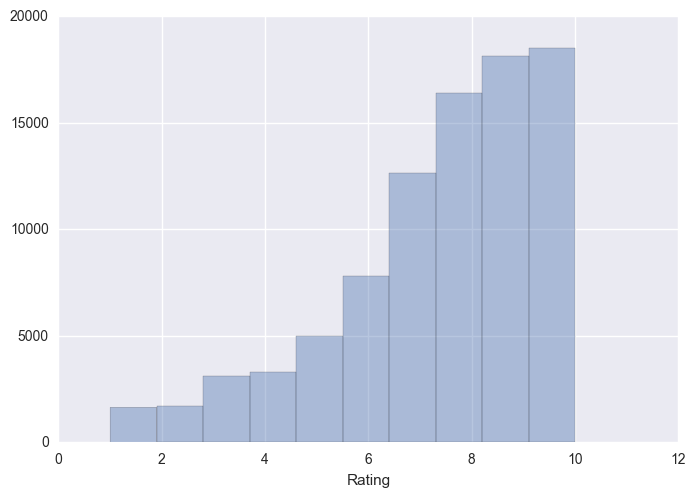

In [57]:
sns.distplot(df1["Rating"], bins = 10, kde = False)

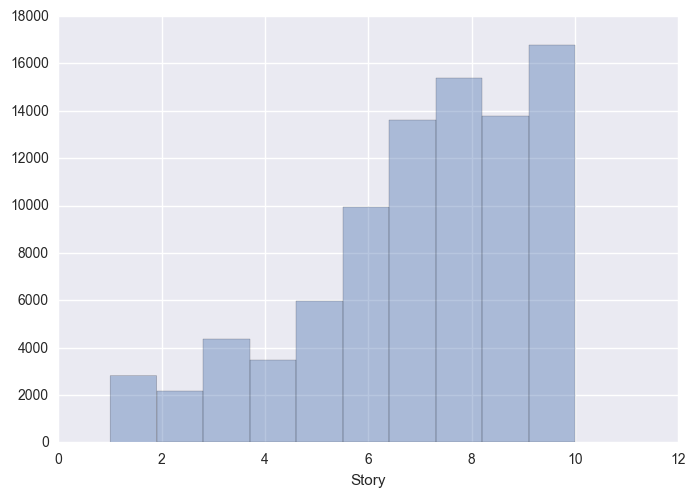

In [58]:
sns.distplot(df1["Story"], bins = 10, kde = False)

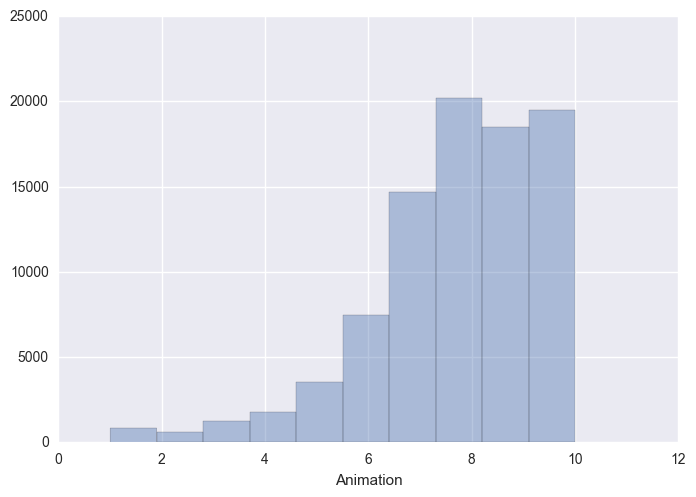

In [59]:
sns.distplot(df1["Animation"], bins = 10, kde = False)

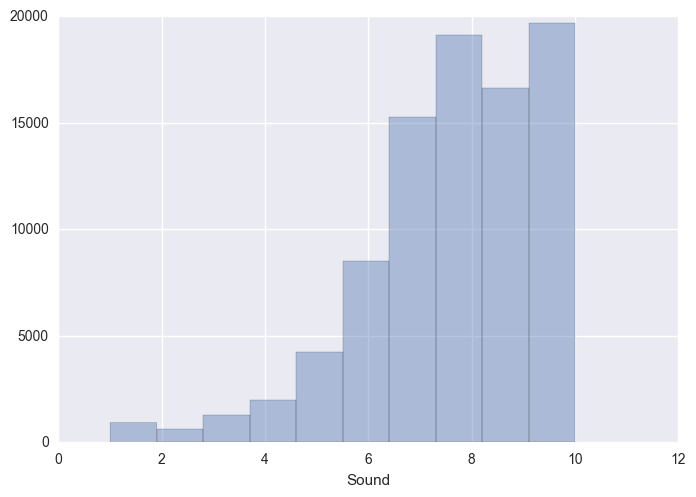

In [60]:
sns.distplot(df1["Sound"], bins = 10, kde = False)

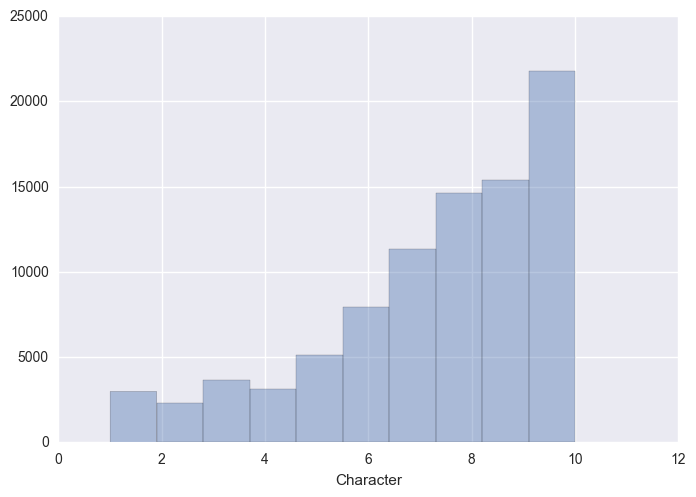

In [61]:
sns.distplot(df1["Character"], bins = 10, kde = False)

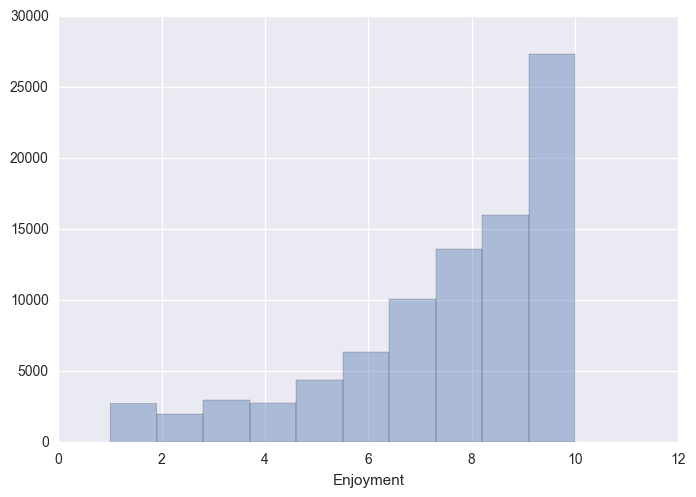

In [62]:
sns.distplot(df1["Enjoyment"], bins = 10, kde = False)

Apparently people don't generally like to write reviews with low ratings at My Anime List.

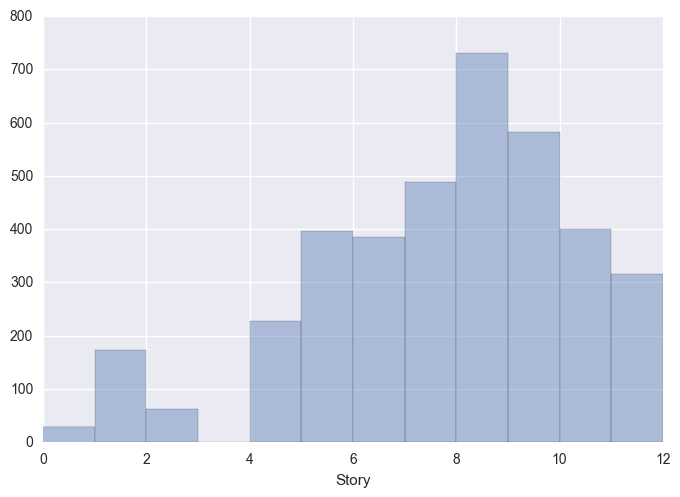

In [63]:
sns.distplot(df2["Story"].dropna(), bins = 12, kde = False)

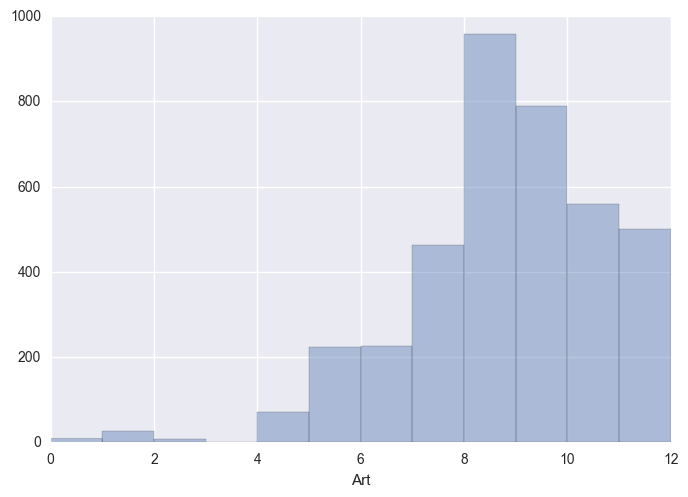

In [64]:
sns.distplot(df2["Art"].dropna(), bins = 12, kde = False)

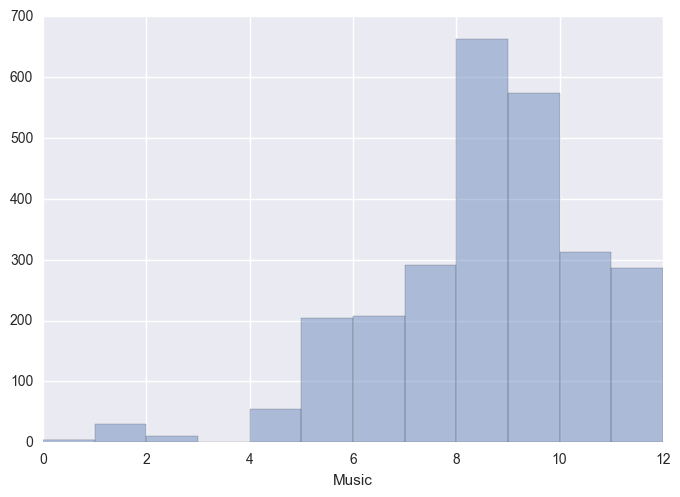

In [65]:
sns.distplot(df2["Music"].dropna(), bins = 12, kde = False)

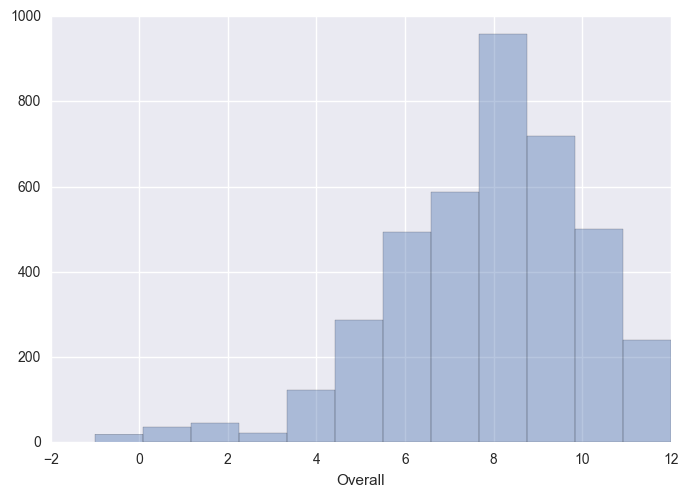

In [66]:
sns.distplot(df2["Overall"].dropna(), bins = 12, kde = False)

Reviews from Anime News Network aren't that positive. They're more balanced.

## Correlations between ratings

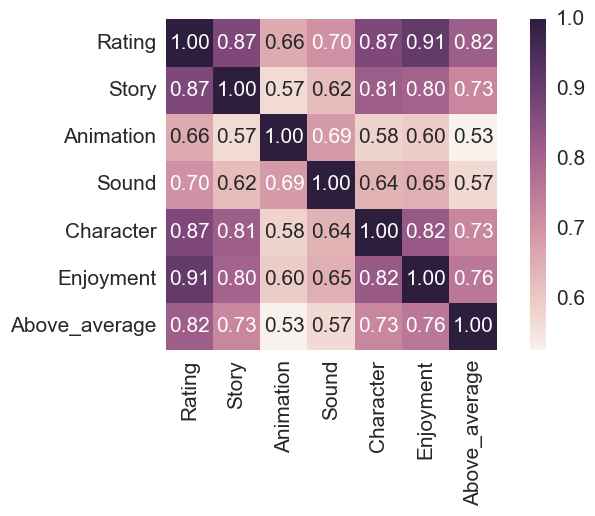

In [67]:
#My anime list
cols = ["Rating", "Story", "Animation", "Sound", "Character", "Enjoyment", "Above_average"]

import numpy as np
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

Enjoyment seems to be the most important for My Anime List users.

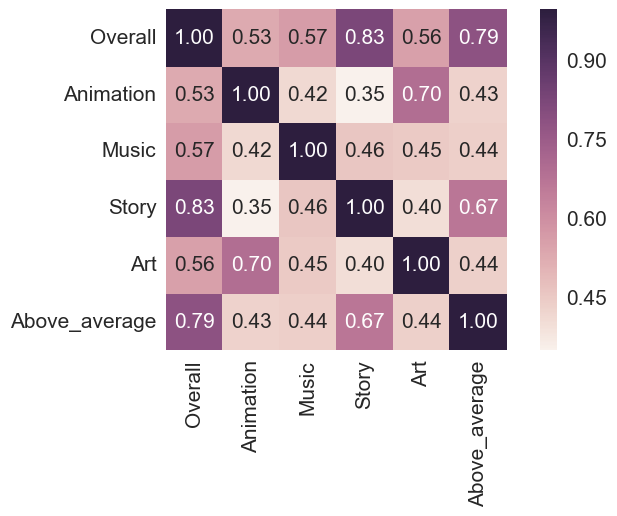

In [68]:
#Anime news netwrok
cols = ['Overall', 'Animation', 'Music', 'Story', 'Art', "Above_average"]

import numpy as np
cm = np.corrcoef(df2[cols].dropna().values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

The story seems to be the most important this time.

## Exploring the text data

In [69]:
import nltk

In [70]:
ANN_Reviews = nltk.text.TextCollection(df2["Review"])

In [71]:
ANN_Reviews.collocations()

character designs; fan service; high school; second half; english dub;
sound effects; musical score; first volume; action scenes; first half;
character development; original japanese; feels like; english script;
voice actors; clean opener; magical girl; looks like; sailor moon;
dragon ball


hmm...

In [72]:
MyAnimeList_Reviews = nltk.text.TextCollection(df1["Review"])

In [73]:
MyAnimeList_Reviews.collocations()

character development; main character; voice acting; high school; even
though; second season; main characters; character designs; first
season; voice actors; 've seen; pretty much; art style; fan service;
n't really; first episode; well done; code geass; ever seen; feel like


# Training a model

In [194]:
# dividing data into a training set and a test set
from sklearn.model_selection import train_test_split

X1 = df1["Review"].values
y1 = df1['Rating'].values

X_for_now, X_for_later, y_for_now, y_for_later = train_test_split(X1, y1, test_size = 0.4)

In [210]:
X_for_now.shape

(52953,)

In [211]:
# dividing data into a training set and a test set
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_for_now, y_for_now, test_size = 0.1)

In [212]:
# How to change lists of words to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

def identity(x):
    return x

tdidf = TfidfVectorizer(tokenizer = identity, 
                        lowercase = False,
                        
                        ngram_range = (1,2),
                        use_idf = True,
                        min_df = 0.2,
                        max_df = 0.8
                        #max_features = 1000   
                       )

In [213]:
X_train = tdidf.fit_transform(X_train_raw)
X_test = tdidf.transform(X_test_raw)

In [214]:
X_train.shape, X_test.shape

((47657, 316), (5296, 316))

In [215]:
y_train = y_train_raw
y_test = y_test_raw

In [216]:
# metric: 'is an anime rated above average?' classification accuracy

mean_rating = np.mean(y_train)
print(mean_rating)

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def above_average_accuracy(y_true, y_predicted, **kwargs):
    if kwargs and 'average_true' in kwargs:
        average_true = kwargs['average_true']
    else:
        average_true = np.mean(y_true)
        
    if kwargs and 'average_predicted' in kwargs:
        average_predicted = kwargs['average_predicted']
    else:
        average_predicted = np.mean(y_predicted)
        
    return accuracy_score(np.array(y_true) > average_true, np.array(y_predicted) > average_predicted)

7.56675829364


In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost


xgb = xgboost.XGBRegressor()



param_grid = {             
                # Hyperparameter tuning for the xgboost regressor
               
                # number of trees
                'n_estimators': [400],
                
                # learning rate
                'learning_rate': [0.1],
        
                # parameters regulating depth of trees
                'max_depth': [3],
                'min_child_weight': [3],
                'gamma': [1],
                
        
                # l1 and l2 regularization
                'reg_lambda': [10],
                'reg_alpha': [10],
        
                # sampling
                'colsample_bytree': [0.8],
                'subsample': [0.8],
                'colsample_bylevel': [1]
            }



gs_mse = GridSearchCV(xgb, param_grid, 
                   #scoring = 'neg_mean_squared_error',
                   scoring = make_scorer(above_average_accuracy, greater_is_better=True, average = mean_rating),
                   cv = 5, verbose = 40,
                   n_jobs= 1)

In [224]:
gs_mse = gs_mse.fit(X_train, y_train)
print(gs_mse.best_score_)
print(gs_mse.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1 
[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1, score=0.721255, total=  26.1s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.4s remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1, score=0.731011, total=  26.5s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.2s remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1, score=0.724793, total=  26.0s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1, score=0.722380, total=  26.0s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=200, learning_rate=0.1, score=0.726472, total=  26.0s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1, score=0.727235, total=  37.7s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1, score=0.735627, total=  38.0s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.7min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1, score=0.730668, total=  37.6s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.4min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1, score=0.726157, total=  37.4s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.0min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=300, learning_rate=0.1, score=0.730144, total=  36.5s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.7min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1, score=0.726081, total=  47.8s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  6.5min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1, score=0.735208, total=  48.0s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.4min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1, score=0.732137, total=  51.3s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  8.3min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1, score=0.728780, total=  49.9s
[CV] colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  9.1min remaining:    0.0s


[CV]  colsample_bylevel=1, subsample=0.8, min_child_weight=3, reg_alpha=10, max_depth=3, gamma=1, colsample_bytree=0.8, reg_lambda=10, n_estimators=400, learning_rate=0.1, score=0.733501, total=  49.9s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.0min finished


0.7311412804
{'colsample_bylevel': 1, 'subsample': 0.8, 'min_child_weight': 3, 'reg_alpha': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.8, 'reg_lambda': 10, 'n_estimators': 400, 'learning_rate': 0.1}


In [225]:
best = gs_mse.best_estimator_

## Metrics

In [226]:
y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)

In [227]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('above_average_accuracy train: %.3f, test: %.3f' % (
        above_average_accuracy(y_train, y_train_pred),
        above_average_accuracy(y_test, y_test_pred)))

MSE train: 2.742, test: 3.149
R^2 train: 0.443, test: 0.347
above_average_accuracy train: 0.763, test: 0.742


## Feature importances

In [228]:
inv_vocabulary = {number: word for word, number in tdidf.vocabulary_.items()}
feature_importances = pd.DataFrame({'importances': best.feature_importances_, 'features': pd.Series(inv_vocabulary)})

In [ ]:
feature_importances.sort_values(by = 'importances', ascending = False).head(30)

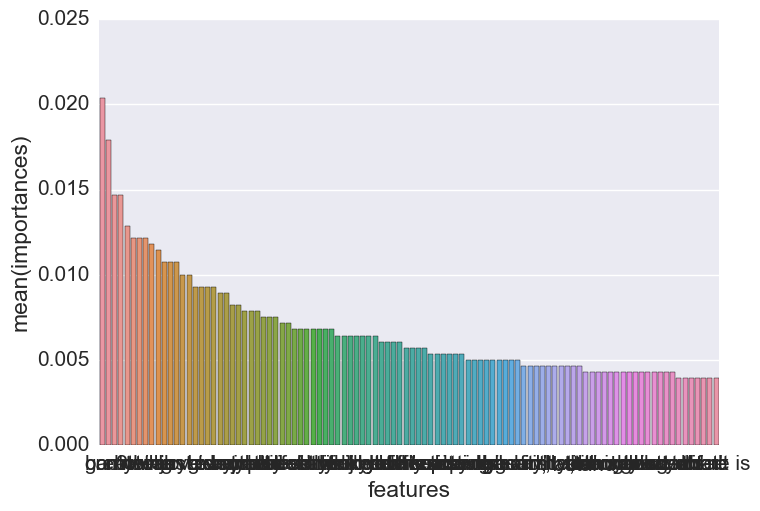

In [230]:
sns.barplot(x= 'features', y = 'importances', data = feature_importances.sort_values(by = 'importances', ascending = False)[0:100])
plt.show()

## Learning curve

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\SmilingAtheist\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

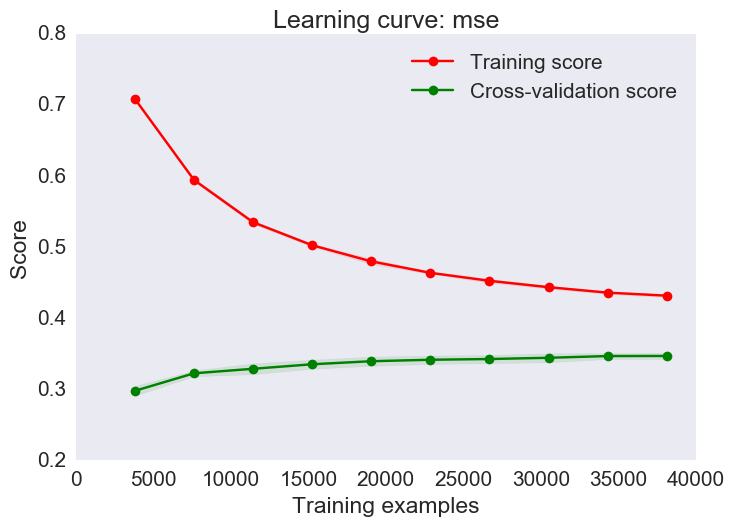

In [ ]:
plot_learning_curve(best, "Learning curve: mse", X_train, y_train, cv=5,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10))

# Evaluation on the Anime News Network Reviews dataset